# Data Import

In [162]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.style.use('seaborn')
warnings.filterwarnings('ignore')
%matplotlib inline

In [163]:
data = pd.read_csv('Auction_master_train.csv')
data.head()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,...,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,...,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,...,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,...,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,...,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,...,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000


In [164]:
data.shape

(1933, 41)

# 전처리

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 41 columns):
Auction_key                    1933 non-null int64
Auction_class                  1933 non-null object
Bid_class                      1933 non-null object
Claim_price                    1933 non-null int64
Appraisal_company              1933 non-null object
Appraisal_date                 1933 non-null object
Auction_count                  1933 non-null int64
Auction_miscarriage_count      1933 non-null int64
Total_land_gross_area          1933 non-null float64
Total_land_real_area           1933 non-null float64
Total_land_auction_area        1933 non-null float64
Total_building_area            1933 non-null float64
Total_building_auction_area    1933 non-null float64
Total_appraisal_price          1933 non-null int64
Minimum_sales_price            1933 non-null int64
First_auction_date             1933 non-null object
Final_auction_date             1933 non-null object
Final_resu

In [165]:
# 범주형 변수 처리하기

categorical = data.select_dtypes(include='object').columns
categorical

Index(['Auction_class', 'Bid_class', 'Appraisal_company', 'Appraisal_date',
       'First_auction_date', 'Final_auction_date', 'Final_result', 'Creditor',
       'addr_do', 'addr_si', 'addr_dong', 'addr_li', 'addr_san', 'addr_etc',
       'Apartment_usage', 'Preserve_regist_date', 'Specific',
       'Share_auction_YorN', 'road_name', 'Close_date', 'Close_result'],
      dtype='object')

In [166]:
data.isnull().sum()

# 'addr_li', 'addr_bunji1', 'addr_bunji2', 'Specific', 
# 'road_bunji1', 'road_bunji2' 에서 결측치가 발생하였습니다.

Auction_key                       0
Auction_class                     0
Bid_class                         0
Claim_price                       0
Appraisal_company                 0
Appraisal_date                    0
Auction_count                     0
Auction_miscarriage_count         0
Total_land_gross_area             0
Total_land_real_area              0
Total_land_auction_area           0
Total_building_area               0
Total_building_auction_area       0
Total_appraisal_price             0
Minimum_sales_price               0
First_auction_date                0
Final_auction_date                0
Final_result                      0
Creditor                          0
addr_do                           0
addr_si                           0
addr_dong                         0
addr_li                        1910
addr_san                          0
addr_bunji1                       4
addr_bunji2                    1044
addr_etc                          0
Apartment_usage             

In [167]:
# 범주형 변수 인코딩

data['Auction_class'].replace({'임의':0, '강제':1},inplace=True)
data['Bid_class'].replace({'개별':0, '일반':1, '일괄':2},inplace=True)
data['addr_san'].replace({'N':0, 'Y':1},inplace=True)
data['Apartment_usage'].replace({'주상복합':0, '아파트':1},inplace=True)
data['Share_auction_YorN'].replace({'N':0, 'Y':1},inplace=True)
data['Close_result'].replace({'    ':0, '배당':1},inplace=True)
data['addr_do'].replace({'부산':0, '서울':1},inplace=True)

In [168]:
data.loc[data['road_name'] == '0', ['road_name', 'road_bunji1']]

# 'road_bunji1'이 결측치인 경우 'road_name'이 값이 모두 '0'임을 알게 되었다

,road_name,road_bunji1
29,0,NaN
84,0,NaN
122,0,NaN
224,0,NaN
239,0,NaN
311,0,NaN
370,0,NaN
464,0,NaN
491,0,NaN
496,0,NaN


In [169]:
data['road_bunji1'].isnull().sum()

24

In [170]:
data.loc[data['road_bunji1'].isnull(), ['addr_do', 'addr_si', 'addr_dong','addr_bunji1', 'addr_bunji2', 'addr_etc', 'road_name', 'road_bunji1', 'road_bunji2']]

,addr_do,addr_si,addr_dong,addr_bunji1,addr_bunji2,addr_etc,road_name,road_bunji1,road_bunji2
29,0,동래구,낙민동,236.0,NaN,",237-2 삼주 8층 801호",0,NaN,NaN
84,0,동래구,낙민동,236.0,NaN,",237-2 삼주 7층 701호",0,NaN,NaN
122,0,동래구,낙민동,236.0,NaN,",237-2 삼주 6층 602호",0,NaN,NaN
224,0,동래구,낙민동,236.0,NaN,",237-2 삼주 11층 1101호",0,NaN,NaN
239,0,동래구,낙민동,236.0,NaN,",237-2 삼주 10층 1001호",0,NaN,NaN
311,0,동래구,낙민동,236.0,NaN,",237-2 삼주 9층 901호",0,NaN,NaN
370,0,동래구,낙민동,236.0,NaN,",237-2 삼주 15층 1502호",0,NaN,NaN
464,0,동래구,낙민동,236.0,NaN,",237-2 삼주 12층 1201호",0,NaN,NaN
491,0,동래구,낙민동,236.0,NaN,",237-2 삼주 13층 1302호",0,NaN,NaN
496,0,동래구,낙민동,236.0,NaN,",237-2 삼주 4층 401호",0,NaN,NaN


In [171]:
data.loc[[29,84,122,224,239,311,370,464,491,496,560,613,637,656,658], 'road_bunji1'] = 71
data.loc[564, 'road_bunji1'] = 30
data.loc[830, 'road_bunji1'] = 451
data.loc[1016, 'road_bunji1'] = 15
data.loc[1212, 'road_bunji1'] = 988
data.loc[1346, 'road_bunji1'] = 367
data.loc[1595, 'road_bunji1'] = 62
data.loc[1596, 'road_bunji1'] = 29
data.loc[1632, 'road_bunji1'] = 29
data.loc[1832, 'road_bunji1'] = 27

# 24개의 지번 주소를 직접 검색하여 결측치 처리하였다

# 변수 제거

In [174]:
del data['Final_result']
# 모든 값이 '낙찰'이므로 필요없는 변수라고 판단하여 제거하였다

In [175]:
del data['Auction_key']
# key 값은 필요없다고 판단하여 제거하였다

In [176]:
del data['Appraisal_company']
del data['addr_si']
del data['addr_dong']
del data['addr_li']
del data['addr_etc']
del data['Specific']
del data['road_name']
del data['Creditor']
# unique 값이 매우 많은 범주형 변수는 제거하였다

In [177]:
del data['addr_bunji1']
del data['addr_bunji2']
del data['road_bunji2']
# addr_do외에 필요없다고 생각되는 주소 정보 변수를 제거하였다

In [178]:
data.shape

(1933, 29)

In [179]:
data.isnull().sum()

Auction_class                  0
Bid_class                      0
Claim_price                    0
Appraisal_date                 0
Auction_count                  0
Auction_miscarriage_count      0
Total_land_gross_area          0
Total_land_real_area           0
Total_land_auction_area        0
Total_building_area            0
Total_building_auction_area    0
Total_appraisal_price          0
Minimum_sales_price            0
First_auction_date             0
Final_auction_date             0
Creditor                       0
addr_do                        0
addr_san                       0
Apartment_usage                0
Preserve_regist_date           0
Total_floor                    0
Current_floor                  0
Share_auction_YorN             0
road_bunji1                    0
Close_date                     0
Close_result                   0
point.y                        0
point.x                        0
Hammer_price                   0
dtype: int64

In [183]:
categorical = data.select_dtypes(include='object').columns
categorical
# date 변수외의 모든 범주형 변수들을 처리하였다

Index(['Appraisal_date', 'First_auction_date', 'Final_auction_date',
       'Preserve_regist_date', 'Close_date'],
      dtype='object')

In [184]:
del data['Appraisal_date']
del data['First_auction_date']
del data['Final_auction_date']
del data['Preserve_regist_date']
del data['Close_date']
# 날짜 변수를 제거하였다

# EDA

In [188]:
df_x = data.drop(['Hammer_price'],axis=1)
df_y = pd.DataFrame(data['Hammer_price'],columns=['Hammer_price'])

In [189]:
df_x.corr()

,Auction_class,Bid_class,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,...,addr_do,addr_san,Apartment_usage,Total_floor,Current_floor,Share_auction_YorN,road_bunji1,Close_result,point.y,point.x
Auction_class,1.000000,-0.128420,-0.052025,0.064498,0.067789,-0.045935,-0.005182,-0.021547,-0.013988,-0.035694,...,-0.033180,-0.015638,-0.132727,-0.090146,-0.015933,0.208536,0.004051,-0.014093,-0.031377,0.034449
Bid_class,-0.128420,1.000000,-0.233687,-0.151884,-0.160280,0.055316,0.161695,0.158624,0.148806,0.144568,...,0.002516,-0.206988,0.226296,0.100746,0.019175,0.026340,0.010036,0.007570,0.000615,0.003108
Claim_price,-0.052025,-0.233687,1.000000,0.013312,0.015411,0.003771,0.180421,0.182207,0.202379,0.204000,...,0.100203,0.008634,0.006534,0.016466,0.043258,-0.029882,-0.035992,0.004645,0.095939,-0.103605
Auction_count,0.064498,-0.151884,0.013312,1.000000,0.972918,-0.045697,0.062824,0.062868,0.107074,0.104286,...,-0.053300,-0.024238,-0.112422,-0.052329,-0.029124,0.019374,-0.057581,-0.006796,-0.054074,0.051634
Auction_miscarriage_count,0.067789,-0.160280,0.015411,0.972918,1.000000,-0.050457,0.069582,0.069392,0.118290,0.114779,...,-0.056091,-0.027348,-0.121830,-0.045343,-0.021852,0.024246,-0.055469,-0.012191,-0.057197,0.054032
Total_land_gross_area,-0.045935,0.055316,0.003771,-0.045697,-0.050457,1.000000,0.049791,0.048225,0.017401,0.016474,...,0.016506,-0.033244,0.130701,0.100557,0.094385,-0.000546,0.050429,0.010205,0.014971,-0.014285
Total_land_real_area,-0.005182,0.161695,0.180421,0.062824,0.069582,0.049791,1.000000,0.996224,0.940361,0.934759,...,0.064039,-0.043614,0.120876,-0.072543,-0.062673,-0.003757,0.018283,-0.004487,0.060602,-0.062621
Total_land_auction_area,-0.021547,0.158624,0.182207,0.062868,0.069392,0.048225,0.996224,1.000000,0.938144,0.941681,...,0.059051,-0.041900,0.117132,-0.068385,-0.061274,-0.079567,0.019449,-0.004537,0.055776,-0.057796
Total_building_area,-0.013988,0.148806,0.202379,0.107074,0.118290,0.017401,0.940361,0.938144,1.000000,0.993533,...,0.067411,-0.059210,-0.000785,0.107069,0.071110,-0.010387,0.016639,0.002319,0.062797,-0.064572
Total_building_auction_area,-0.035694,0.144568,0.204000,0.104286,0.114779,0.016474,0.934759,0.941681,0.993533,1.000000,...,0.060118,-0.056694,-0.002579,0.108707,0.069819,-0.113234,0.019566,0.002521,0.055730,-0.057502


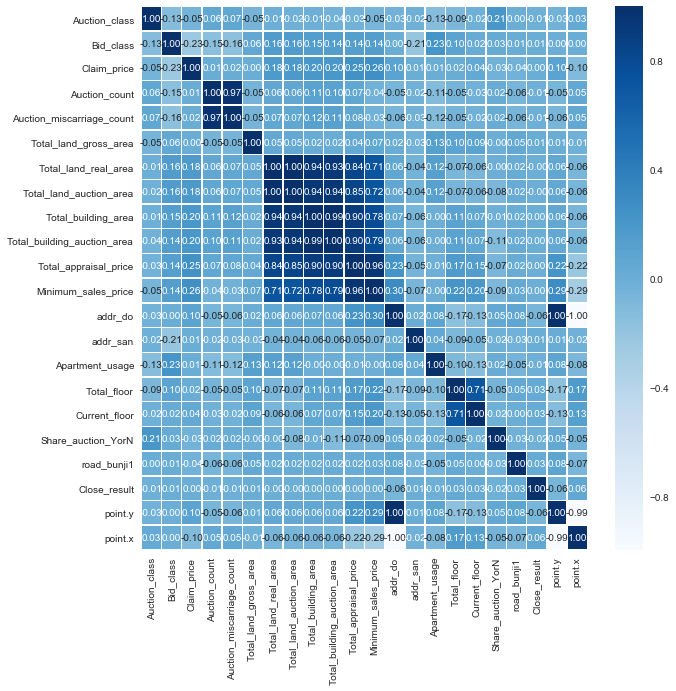

In [191]:
#상관계수 행렬
plt.figure(figsize=(10,10))
sns.heatmap(data = df_x.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

# 다중공선성 확인 및 처리

In [192]:
#VIF확인하기
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    df_x.values, i) for i in range(df_x.shape[1])]
vif["features"] = df_x.columns
vif.sort_values(["VIF Factor"], ascending=[False])

# point,x, addr_do, Total_land_auction_area, Total_land_real_area,
# Total_building_auction_area, Total_building_area, point.y,
# Total_appraisal_price, Minimum_sales_price, Auction_miscarriage_count,
# Auction_count의 vif가 10이상이므로 다중공선성이 있다고 판단된다.

,VIF Factor,features
21,485525.806777,point.x
12,2287.229121,addr_do
7,998.759344,Total_land_auction_area
6,980.857371,Total_land_real_area
9,786.898554,Total_building_auction_area
8,762.149865,Total_building_area
20,530.040391,point.y
10,68.291958,Total_appraisal_price
11,35.898983,Minimum_sales_price
4,19.238360,Auction_miscarriage_count


# fit된 모델의 평가

In [193]:
# train, test data 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0)

In [194]:
from sklearn.linear_model import LinearRegression

#모델 불러옴
model = LinearRegression()
#train data에 fit시킴
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [195]:
#fit된 모델의 R-square
model.score(X_train, y_train)

0.9913167013834226

In [196]:
#MSE
import sklearn as sk
sk.metrics.mean_squared_error(y_train, model.predict(X_train))

3083986761575975.0

In [198]:
#test데이터 R-square
model.score(X_test, y_test)

0.9849411047828461

In [ ]:
"""
    MSE: 3083986761575975
    train R-square: 0.9913167013834226
    test R-square: 0.9849411047828461
"""

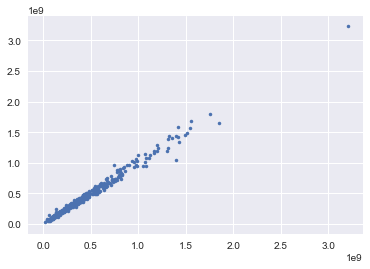

In [200]:
# 예측 vs. 실제데이터 plot
y_pred = model.predict(X_test) 
plt.plot(y_test, y_pred, '.')

# 예측과 실제가 비슷하면, 라인상에 분포함
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()

## 다중공선성 큰 변수 제거하기 1

In [201]:
#다중공선성이 제일 큰 변수를 제거하고 다시하기
data2 = data.drop(['point.x'],axis=1)
data2.head()

,Auction_class,Bid_class,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,...,addr_do,addr_san,Apartment_usage,Total_floor,Current_floor,Share_auction_YorN,road_bunji1,Close_result,point.y,Hammer_price
0,0,0,1766037301,2,1,12592.0,37.35,37.35,181.77,181.77,...,0,0,0,45,5,0,30.0,1,35.162717,760000000
1,0,1,152946867,2,1,42478.1,18.76,18.76,118.38,118.38,...,0,0,1,70,51,0,33.0,1,35.156633,971889999
2,0,0,11326510,3,2,149683.1,71.00,71.00,49.94,49.94,...,0,0,1,15,14,0,88.0,1,35.184601,93399999
3,0,1,183581724,2,1,24405.0,32.98,32.98,84.91,84.91,...,0,0,1,20,11,0,110.0,1,35.154180,256899000
4,1,1,45887671,2,1,774.0,45.18,45.18,84.96,84.96,...,0,0,1,7,7,0,51.0,1,35.099630,158660000


In [203]:
df2_x = data2.drop(['Hammer_price'], axis=1)
df2_y = pd.DataFrame(data2['Hammer_price'],columns=['Hammer_price'])
df2_x.head()

,Auction_class,Bid_class,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,...,Minimum_sales_price,addr_do,addr_san,Apartment_usage,Total_floor,Current_floor,Share_auction_YorN,road_bunji1,Close_result,point.y
0,0,0,1766037301,2,1,12592.0,37.35,37.35,181.77,181.77,...,668800000,0,0,0,45,5,0,30.0,1,35.162717
1,0,1,152946867,2,1,42478.1,18.76,18.76,118.38,118.38,...,858400000,0,0,1,70,51,0,33.0,1,35.156633
2,0,0,11326510,3,2,149683.1,71.00,71.00,49.94,49.94,...,76160000,0,0,1,15,14,0,88.0,1,35.184601
3,0,1,183581724,2,1,24405.0,32.98,32.98,84.91,84.91,...,230720000,0,0,1,20,11,0,110.0,1,35.154180
4,1,1,45887671,2,1,774.0,45.18,45.18,84.96,84.96,...,136000000,0,0,1,7,7,0,51.0,1,35.099630


In [204]:
# train, test data 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df2_x, df2_y, test_size=0.2, random_state=0)

In [205]:
#모델 불러옴
model = LinearRegression()
#train data에 fit시킴
model.fit(X_train, y_train)
#fit된 모델의 R-square
model.score(X_train, y_train)

0.9912597527400911

In [206]:
#MSE
import sklearn as sk
sk.metrics.mean_squared_error(y_train, model.predict(X_train))

3104212815047031.0

In [207]:
#test데이터 R-square
model.score(X_test, y_test)

0.9849686058037032

In [208]:
"""
    MSE: 3104212815047031
    train R-square: 0.9912597527400911
    test R-square: 0.9849686058037032
"""

'\n    MSE: 3104212815047031\n    train R-square: 0.9912597527400911\n    test R-square: 0.9849686058037032\n'

In [218]:
# test data의 R-square가 증가하여 
# point.x 변수를 제거시킨 효과가 있는 것으로 판단

## 다중공선성 큰 변수 제거하기 2

In [209]:
#VIF확인하기
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    df2_x.values, i) for i in range(df2_x.shape[1])]
vif["features"] = df2_x.columns
vif.sort_values(["VIF Factor"], ascending=[False])

# 다시 vif를 확인해본 결과 Total_land_auction_area, Total_building_auction_area,
# Total_land_real_area, Total_building_area 등의 변수가 
# 다중공선성이 있다고 판단된다

In [213]:
#다중공선성이 제일 큰 변수를 제거하고 다시하기
data3 = data2.drop(['Total_land_auction_area'],axis=1)
data3.head()

,Auction_class,Bid_class,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,...,addr_do,addr_san,Apartment_usage,Total_floor,Current_floor,Share_auction_YorN,road_bunji1,Close_result,point.y,Hammer_price
0,0,0,1766037301,2,1,12592.0,37.35,181.77,181.77,836000000,...,0,0,0,45,5,0,30.0,1,35.162717,760000000
1,0,1,152946867,2,1,42478.1,18.76,118.38,118.38,1073000000,...,0,0,1,70,51,0,33.0,1,35.156633,971889999
2,0,0,11326510,3,2,149683.1,71.00,49.94,49.94,119000000,...,0,0,1,15,14,0,88.0,1,35.184601,93399999
3,0,1,183581724,2,1,24405.0,32.98,84.91,84.91,288400000,...,0,0,1,20,11,0,110.0,1,35.154180,256899000
4,1,1,45887671,2,1,774.0,45.18,84.96,84.96,170000000,...,0,0,1,7,7,0,51.0,1,35.099630,158660000


In [221]:
df3_x = data3.drop(['Hammer_price'], axis=1)
df3_y = pd.DataFrame(data3['Hammer_price'],columns=['Hammer_price'])
df3_x.head()

,Auction_class,Bid_class,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,addr_do,addr_san,Apartment_usage,Total_floor,Current_floor,Share_auction_YorN,road_bunji1,Close_result,point.y
0,0,0,1766037301,2,1,12592.0,37.35,181.77,181.77,836000000,668800000,0,0,0,45,5,0,30.0,1,35.162717
1,0,1,152946867,2,1,42478.1,18.76,118.38,118.38,1073000000,858400000,0,0,1,70,51,0,33.0,1,35.156633
2,0,0,11326510,3,2,149683.1,71.00,49.94,49.94,119000000,76160000,0,0,1,15,14,0,88.0,1,35.184601
3,0,1,183581724,2,1,24405.0,32.98,84.91,84.91,288400000,230720000,0,0,1,20,11,0,110.0,1,35.154180
4,1,1,45887671,2,1,774.0,45.18,84.96,84.96,170000000,136000000,0,0,1,7,7,0,51.0,1,35.099630


In [222]:
# train, test data 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df3_x, df3_y, test_size=0.2, random_state=0)

In [223]:
#모델 불러옴
model = LinearRegression()
#train data에 fit시킴
model.fit(X_train, y_train)
#fit된 모델의 R-square
model.score(X_train, y_train)

0.9912479380022593

In [224]:
#MSE
import sklearn as sk
sk.metrics.mean_squared_error(y_train, model.predict(X_train))

3108408973289864.0

In [225]:
#test데이터 R-square
model.score(X_test, y_test)

0.9849792139525039

In [226]:
"""
    MSE: 3108408973289864
    train R-square: 0.9912479380022593
    test R-square: 0.9849792139525039
"""

'\n    MSE: 3108408973289864\n    train R-square: 0.9912479380022593\n    test R-square: 0.9849792139525039\n'

In [253]:
# test data의 R-square가 증가하여 
# Total_land_auction_area 변수를 제거시킨 효과가 있는 것으로 판단

## 다중공선성 큰 변수 제거하기 3

In [228]:
#VIF확인하기
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    df3_x.values, i) for i in range(df3_x.shape[1])]
vif["features"] = df3_x.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
7,808.573870,Total_building_area
8,798.749413,Total_building_auction_area
19,237.779759,point.y
18,162.267062,Close_result
9,95.282970,Total_appraisal_price
3,91.129804,Auction_count
10,58.985049,Minimum_sales_price
4,36.462436,Auction_miscarriage_count
6,23.442627,Total_land_real_area
1,18.455200,Bid_class


In [230]:
#다중공선성이 제일 큰 변수를 제거하고 다시하기
data4 = data3.drop(['Total_building_area'],axis=1)
df4_x = data4.drop(['Hammer_price'], axis=1)
df4_y = pd.DataFrame(data4['Hammer_price'],columns=['Hammer_price'])

In [231]:
# train, test data 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df4_x, df4_y, test_size=0.2, random_state=0)

In [232]:
#모델 불러옴
model = LinearRegression()
#train data에 fit시킴
model.fit(X_train, y_train)
#fit된 모델의 R-square
model.score(X_train, y_train)

0.9912462321416788

In [233]:
#MSE
import sklearn as sk
sk.metrics.mean_squared_error(y_train, model.predict(X_train))

3109014831924885.5

In [234]:
#test데이터 R-square
model.score(X_test, y_test)

0.9849798236203336

In [235]:
"""
    MSE: 3109014831924885.5
    train R-square: 0.9912462321416788
    test R-square: 0.9849798236203336
"""

'\n    MSE: 3109014831924885.5\n    train R-square: 0.9912462321416788\n    test R-square: 0.9849798236203336\n'

In [236]:
# test data의 R-square가 증가하여 
# Total_building_area 변수를 제거시킨 효과가 있는 것으로 판단

## 다중공선성 큰 변수 제거하기 4

In [255]:
#VIF확인하기
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    df4_x.values, i) for i in range(df4_x.shape[1])]
vif["features"] = df4_x.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
18,237.139034,point.y
17,162.055942,Close_result
8,95.003145,Total_appraisal_price
3,91.117523,Auction_count
9,58.854913,Minimum_sales_price
4,36.437327,Auction_miscarriage_count
7,33.953555,Total_building_auction_area
6,22.919801,Total_land_real_area
1,18.447315,Bid_class
13,10.934598,Total_floor


In [257]:
#다중공선성이 제일 큰 변수를 제거하고 다시하기
data5 = data4.drop(['point.y'],axis=1)
df5_x = data5.drop(['Hammer_price'], axis=1)
df5_y = pd.DataFrame(data5['Hammer_price'],columns=['Hammer_price'])

In [258]:
# train, test data 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df5_x, df5_y, test_size=0.2, random_state=0)

#모델 불러옴
model = LinearRegression()
#train data에 fit시킴
model.fit(X_train, y_train)
#fit된 모델의 R-square
model.score(X_train, y_train)

0.9912122131508009

In [259]:
#MSE
import sklearn as sk
sk.metrics.mean_squared_error(y_train, model.predict(X_train))

3121097120251284.0

In [260]:
#test데이터 R-square
model.score(X_test, y_test)

0.9850199283648312

In [261]:
# MSE가 크게 증가하여 4번째 변수는 제거하지 않기로 했다.

# 정규화

In [263]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df4_x, df4_y, test_size=0.2, random_state=0)

In [264]:
#Ridge, Lasso 회귀
from sklearn.linear_model import Ridge, Lasso

ridge=Ridge(alpha=1.0)#alpha: 얼마나 정규화를 할건지 정하는 양수 하이퍼파라미터 (클수록 더 정규화)
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [265]:
#R-square
ridge.score(X_train,y_train)

0.9912331382276185

In [266]:
#정규화를 덜하니까 R-square가 오히려 증가했다.
ridge=Ridge(alpha=0.3)
ridge.fit(X_train, y_train)
ridge.score(X_train,y_train)

0.9912428559153036

In [267]:
#Lasso
lasso=Lasso(alpha=0.3)
lasso.fit(X_train, y_train)
lasso.score(X_train, y_train)

0.9912460471319195

In [269]:
"""
    정규화를 할수록 오히려 R-square가 감소했다.
"""

'\n    정규화를 할수록 오히려 R-square가 감소했다.\n'

In [270]:
"""
    [최종 모델 평가]
    
    MSE: 3109014831924885.5
    train R-square: 0.9912462321416788
    test R-square: 0.9849798236203336
"""

'\n    [최종 모델 평가]\n    MSE: 3109014831924885.5\n    train R-square: 0.9912462321416788\n    test R-square: 0.9849798236203336\n'